#### This Notebook Fits and Evaluates Logistic Regression for all three datasets


In [1]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from normalizer import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from results import ModelEvaluation
from joblib import dump

    Lets write some macros for I/O

In [36]:
def print_info(msg):
    print("[INFO] "+str(msg))

def print_err(msg):
    print("[ERR] "+str(msg))

def get_balanced_sample(data_frame, n):
    # Separate the DataFrame into two DataFrames based on class
    class_0_df = data_frame[data_frame['label'] == 0]
    class_1_df = data_frame[data_frame['label'] == 1]

    # Calculate the number of samples for each class in the balanced sample
    n_per_class = n // 2  # Divide by 2 to get an equal number of samples for each class

    # Sample n_per_class random rows from each class
    balanced_sample_class_0 = class_0_df.sample(n=n_per_class, random_state=42)
    balanced_sample_class_1 = class_1_df.sample(n=n_per_class, random_state=42)

    # Combine the balanced samples into a single DataFrame
    balanced_sample = pd.concat([balanced_sample_class_0, balanced_sample_class_1])

    # Shuffle the balanced sample
    balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_sample


def get_combined_datasets(data_frame_one, data_frame_two):
    combined_df = pd.concat([data_frame_one, data_frame_two])

# Step 2: Shuffle the combined DataFrame
    shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)
    return shuffled_df

def save_model(model, name):
    dump(model, "../FinalModels/models/"+str(name))

def save_vectorizer(vectorizer, name):
    dump(vectorizer, "../FinalModels/vectorizers/"+str(name))

    Let's initialize some objects that we need through-out

In [3]:
normalizer = Normalizer()
results = ModelEvaluation()
SAMPLE_SIZE = 20000
print_info("OBJECTS INIT DONE.")

[INFO] OBJECTS INIT DONE.


        Let's load all the datasets:

In [4]:
TwitterData = pd.read_csv("../FinalModels/datasets/TwitterData.csv")
print_info("Twitter Dataset is now loaded.")

NewsHeadlinesData =  pd.read_csv("../FinalModels/datasets/NewsHeadlines.csv")
print_info("NewHeadlines Dataset is now loaded.")

RedditData = pd.read_csv("../FinalModels/datasets/RedditData.csv")
print_info("Reddit Dataset is now loaded.")

TwitterNewsData = pd.read_csv("../FinalModels/datasets/TwitterNews.csv")
print_info("Twitter News data is now loaded.")

CombinedData = pd.read_csv("../FinalModels/datasets/Twitter_News_Reddit.csv")
print_info("The combined dataset is now loaded.")


[INFO] Twitter Dataset is now loaded.
[INFO] NewHeadlines Dataset is now loaded.
[INFO] Reddit Dataset is now loaded.
[INFO] Twitter News data is now loaded.
[INFO] The combined dataset is now loaded.


# 1. Logistic Regression for News Headlines dataset:

In [5]:
news_matrix = normalizer.vectorize(pd.DataFrame({"text": NewsHeadlinesData["text"].astype("str")}))
news_vectorizer = normalizer.get_vertorizer()
dump(news_vectorizer,"../FinalModels/vectorizers/NewsHeadlines_LR_Vectorizer.joblib")
print_info("Here's the sprase matrix info: ")
news_matrix

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.
[INFO] Here's the sprase matrix info: 


<20000x22618 sparse matrix of type '<class 'numpy.float64'>'
	with 191328 stored elements in Compressed Sparse Row format>

In [6]:
print_info("Attempting to split data into train and test sets.")
y_news = NewsHeadlinesData["label"].astype("int")
X_news = news_matrix.toarray()
X_news_train, X_news_test, y_news_train, y_news_test = train_test_split(X_news, y_news, test_size=0.20, random_state=42, stratify=y_news)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


In [8]:
print_info("Creating a new instance of Logistic for News Headlines")
lr_news = LogisticRegression()
print_info("Fitting a Logistic Regression to this")
lr_news.fit(X_news_train, y_news_train)
print_info("DONE.")

[INFO] Creating a new instance of Logistic for News Headlines
[INFO] Fitting a Logistic Regression to this
[INFO] DONE.


In [9]:
print_info("Asking the LR trained on News Headlines to make some Predictions")
y_news_pred = lr_news.predict(X_news_test)
print_info("Predictions have been obtained.")


[INFO] Asking the LR trained on News Headlines to make some Predictions
[INFO] Predictions have been obtained.


In [10]:
print_info("The following are the evaluation metrics for LR over news headlines:")
results.classification_report(y_news_test, y_news_pred)

[INFO] The following are the evaluation metrics for LR over news headlines:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      2000
           1       0.82      0.87      0.85      2000

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



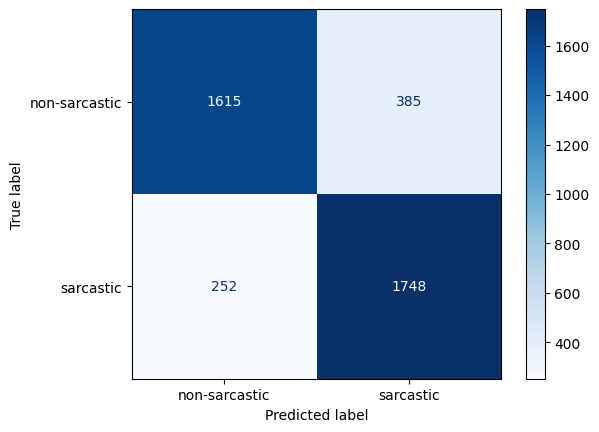

In [11]:
results.get_cm(y_true=y_news_test, y_pred=y_news_pred)

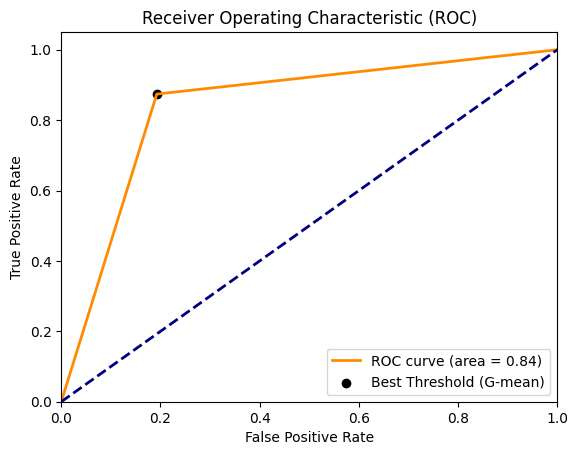

Best Threshold=1.0000


In [13]:
y_proba_news = lr_news.predict_proba(X_news_test)[:,1]
news_threshold = results.get_roc(y_news_test, y_news_pred)

In [14]:
results.cross_validation_score(lr_news, X_news, y_news)

Cross-validation scores for each fold: [0.83775 0.833   0.8315  0.83    0.84275]
Mean score: 0.835
Standard Deviation of the scores: 0.004666369038128047


array([0.83775, 0.833  , 0.8315 , 0.83   , 0.84275])

In [15]:
dump(lr_news, "../FinalModels/models/NewsHeadlines_LogisticRegression.joblib")

['../FinalModels/models/NewsHeadlines_LogisticRegression.joblib']

# 2. Logistic Regression for Twitter Set:

In [16]:
twitter_matrix = normalizer.vectorize(pd.DataFrame({"text": TwitterData["text"].astype("str")}))
twitter_vectorizer = normalizer.get_vertorizer()
dump(twitter_vectorizer,"../FinalModels/vectorizers/Twitter_LR_Vectorizer.joblib")
print_info("Here's the sprase matrix info: ")
twitter_matrix

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.
[INFO] Here's the sprase matrix info: 


<20000x22191 sparse matrix of type '<class 'numpy.float64'>'
	with 276871 stored elements in Compressed Sparse Row format>

In [17]:
print_info("Attempting to split data into train and test sets.")
y_twitter = TwitterData["label"].astype("int")
X_twitter = twitter_matrix
X_twitter_train, X_twitter_test, y_twitter_train, y_twitter_test = train_test_split(X_twitter, y_twitter, test_size=0.20, random_state=42, stratify=y_twitter)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


In [18]:
print_info("Attempting to Fit a Logistic Regression for Twitter dataset: ")
lr_twitter = LogisticRegression()
lr_twitter = lr_twitter.fit(X_twitter_train, y_twitter_train)
print_info("The Logistic Regression instance is now ready for twitter set.")

[INFO] Attempting to Fit a Logistic Regression for Twitter dataset: 
[INFO] The Logistic Regression instance is now ready for twitter set.


In [19]:
print_info("Asking the Naive Bayes trained on Twitter Dataset to make some Predictions")
y_twitter_pred = lr_twitter.predict(X_twitter_test)
print_info("Predictions have been obtained.")


[INFO] Asking the Naive Bayes trained on Twitter Dataset to make some Predictions
[INFO] Predictions have been obtained.


In [20]:
print_info("The following are the evaluation metrics for NB over TwitterSET:")
results.classification_report(y_twitter_test, y_twitter_pred)

[INFO] The following are the evaluation metrics for NB over TwitterSET:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2000
           1       0.80      0.77      0.79      2000

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



[INFO] The following the confusion matirx for Naive Bayes over Twitter Test Set:


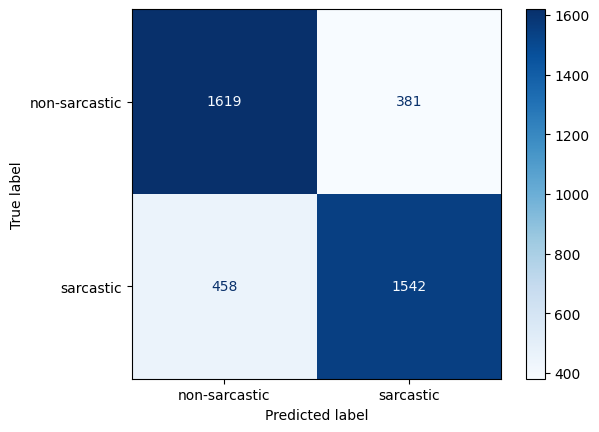

In [21]:
print_info("The following the confusion matirx for Naive Bayes over Twitter Test Set:")
results.get_cm(y_twitter_test, y_twitter_pred)

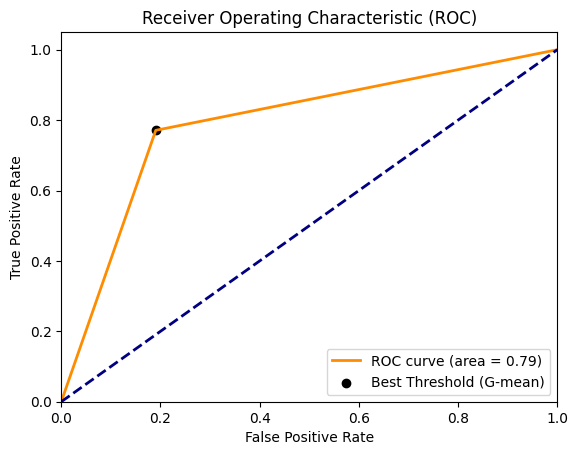

Best Threshold=1.0000


In [23]:
y_proba_twitter = lr_twitter.predict_proba(X_twitter_test)[:,1]
twitter_threshold = results.get_roc(y_twitter_test, y_twitter_pred)

In [24]:
results.cross_validation_score(lr_twitter, X_twitter, y_twitter)

Cross-validation scores for each fold: [0.79025 0.77    0.78325 0.7665  0.7815 ]
Mean score: 0.7782999999999999
Standard Deviation of the scores: 0.008782653357613527


array([0.79025, 0.77   , 0.78325, 0.7665 , 0.7815 ])

In [25]:
dump(lr_twitter, "../FinalModels/models/Twitter_LogisticRegression.joblib")

['../FinalModels/models/Twitter_LogisticRegression.joblib']

# 3. Logistic Regression for Reddit Data

In [26]:
reddit_matrix = normalizer.vectorize(pd.DataFrame({"text": RedditData["text"].astype("str")}))
reddit_vectorizer = normalizer.get_vertorizer()
dump(reddit_vectorizer,"../FinalModels/vectorizers/Reddit_NB_Vectorizer.joblib")
print_info("Here's the sprase matrix info: ")
reddit_matrix

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.
[INFO] Here's the sprase matrix info: 


<20000x41893 sparse matrix of type '<class 'numpy.float64'>'
	with 533494 stored elements in Compressed Sparse Row format>

In [27]:
print_info("Attempting to split data into train and test sets.")
y_reddit = RedditData["label"].astype("int")
X_reddit = reddit_matrix
X_reddit_train, X_reddit_test, y_reddit_train, y_reddit_test = train_test_split(X_reddit, y_reddit, test_size=0.20, random_state=42, stratify=y_reddit)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


In [28]:
print_info("Attempting to Fit a Naive Bayes for Reddit dataset: ")
lr_reddit = LogisticRegression()
lr_reddit = lr_reddit.fit(X_reddit_train, y_reddit_train)
print_info("The Naive Bayes instance is now ready for Reddit set.")

[INFO] Attempting to Fit a Naive Bayes for Reddit dataset: 
[INFO] The Naive Bayes instance is now ready for Reddit set.


In [29]:
print_info("Asking the Naive Bayes trained on Reddit Dataset to make some Predictions")
y_reddit_pred = lr_reddit.predict(X_reddit_test)
print_info("Predictions have been obtained.")


[INFO] Asking the Naive Bayes trained on Reddit Dataset to make some Predictions
[INFO] Predictions have been obtained.


In [30]:
print_info("The following are the evaluation metrics for NB over Reddit:")
results.classification_report(y_reddit_test, y_reddit_pred)

[INFO] The following are the evaluation metrics for NB over Reddit:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2000
           1       0.63      0.58      0.60      2000

    accuracy                           0.62      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.62      0.62      0.62      4000



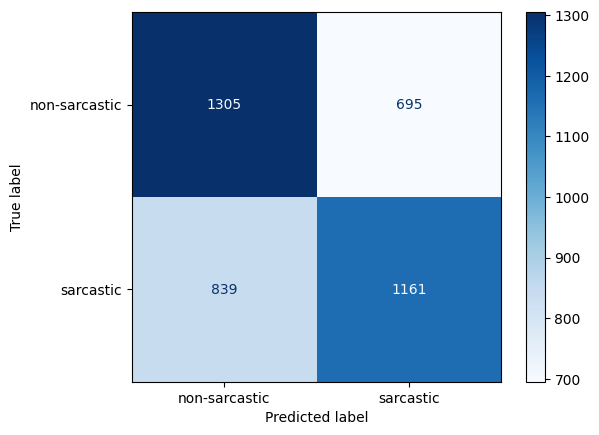

In [31]:
results.get_cm(y_reddit_test, y_reddit_pred)

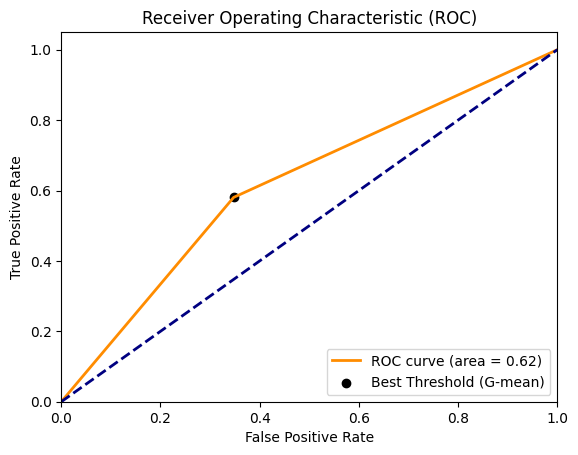

Best Threshold=1.0000


In [32]:
y_proba_reddit = lr_reddit.predict_proba(X_reddit_test)[:,1]
reddit_threshold = results.get_roc(y_reddit_test, y_reddit_pred)

In [33]:
results.cross_validation_score(lr_reddit, X_reddit, y_reddit)

Cross-validation scores for each fold: [0.6085  0.61875 0.625   0.6315  0.62175]
Mean score: 0.6211
Standard Deviation of the scores: 0.007590454531844556


array([0.6085 , 0.61875, 0.625  , 0.6315 , 0.62175])

In [35]:
dump(lr_reddit, "../FinalModels/vectorizers/Reddit_LogisticRegression.joblib")

['../FinalModels/vectorizers/Reddit_LogisticRegression.joblib']

# 4. Twitter + News Headlines dataset:

In [37]:
tn_matrix = normalizer.vectorize(pd.DataFrame({"text": TwitterNewsData["text"].astype("str")}))
TN_vectorizer = normalizer.get_vertorizer()
save_vectorizer(TN_vectorizer, "TwitterNews_LR_Vectorizer.joblib")
tn_matrix

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.


<40000x35137 sparse matrix of type '<class 'numpy.float64'>'
	with 468199 stored elements in Compressed Sparse Row format>

In [38]:
print_info("Attempting to split data into train and test sets.")
y_tn = TwitterNewsData["label"].astype("int")
X_tn = tn_matrix
X_tn_train, X_tn_test, y_tn_train, y_tn_test = train_test_split(X_tn, y_tn, test_size=0.25, random_state=42, stratify=y_tn)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


In [39]:
lr_tn = LogisticRegression()
lr_tn = lr_tn.fit(X_tn_train, y_tn_train)

In [40]:
y_tn_pred = lr_tn.predict(X_tn_test)
results.classification_report(y_tn_test, y_tn_pred)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      5000
           1       0.78      0.75      0.76      5000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



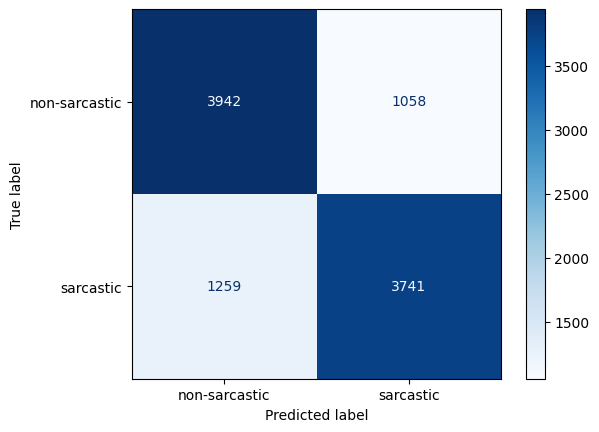

In [41]:
results.get_cm(y_tn_test, y_tn_pred)

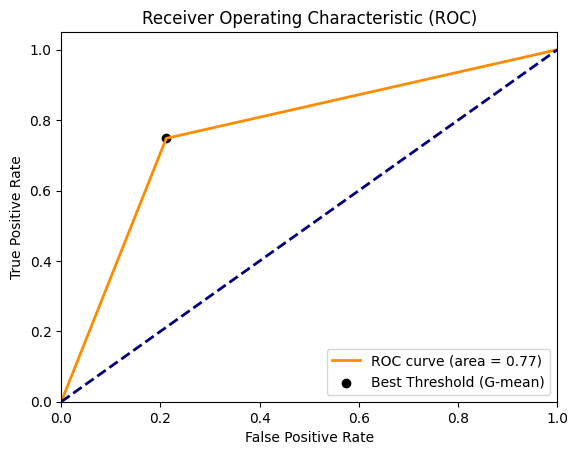

Best Threshold=1.0000


In [42]:
y_proba_tn = lr_tn.predict_proba(X_tn_test)[:,1]
tn_threshold = results.get_roc(y_tn_test, y_tn_pred)

In [44]:
results.cross_validation_score(lr_tn, X_tn, y_tn)

Cross-validation scores for each fold: [0.769375 0.777625 0.76575  0.779625 0.775125]
Mean score: 0.7735000000000001
Standard Deviation of the scores: 0.00518169856321263


array([0.769375, 0.777625, 0.76575 , 0.779625, 0.775125])

In [45]:
save_model(lr_tn,"TwitterNews_LogisticRegression.joblib")

# 5. Twitter Reddit News:

In [60]:
combined_matrix = normalizer.vectorize(pd.DataFrame({"text": CombinedData["text"].astype("str")}))
combined_vectorizer = normalizer.get_vertorizer()
save_vectorizer(combined_vectorizer, "CombinedData_LR_Vectorizer.joblib")

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.


In [61]:
print_info("Attempting to split data into train and test sets.")
y_combined = CombinedData["label"].astype("int")
X_combined = combined_matrix
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, y_combined, test_size=0.25, random_state=42, stratify=y_combined, shuffle=True)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


In [62]:
lr_combined = LogisticRegression()
lr_combined = lr_combined.fit(X_combined_train, y_combined_train)


In [63]:
y_combined_pred = lr_combined.predict(X_combined_test)
results.classification_report(y_combined_test, y_combined_pred)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7500
           1       0.82      0.82      0.82      7500

    accuracy                           0.82     15000
   macro avg       0.82      0.82      0.82     15000
weighted avg       0.82      0.82      0.82     15000



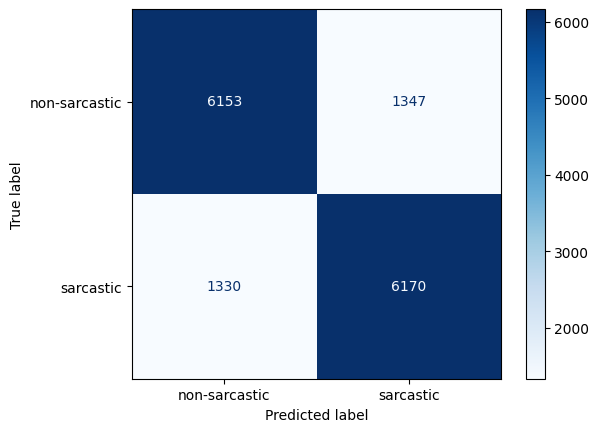

In [64]:
results.get_cm(y_combined_test, y_combined_pred)

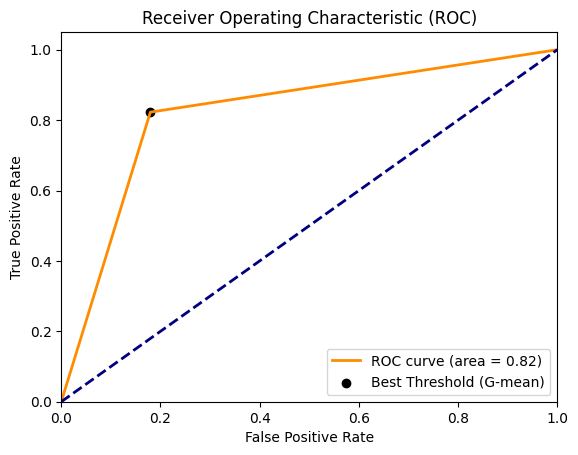

Best Threshold=1.0000


In [65]:
y_proba_combined = lr_combined.predict_proba(X_combined_test)[:,1]
combined_threshold = results.get_roc(y_combined_test, y_combined_pred)

In [66]:
save_model(lr_combined, "CombinedData_LogisticRegresssion.joblib")